# Quantum Game Simulation Example

This notebook shows how to simulate simple quantum games.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from qgsim import QuantumGame, plot_full_payoff_surface

## Simulate a Default Game

In [2]:
# Pass the game's name or a custom payoff matrix
pennies = QuantumGame("matching_pennies", gamma = 0, thetaA = 0, thetaB = 0, phiA = 0, phiB = 0)
pennies.run()

([(0, 0)], [1000], 1.0, -1.0)

## Plot the Full Payoff Surface of Player A

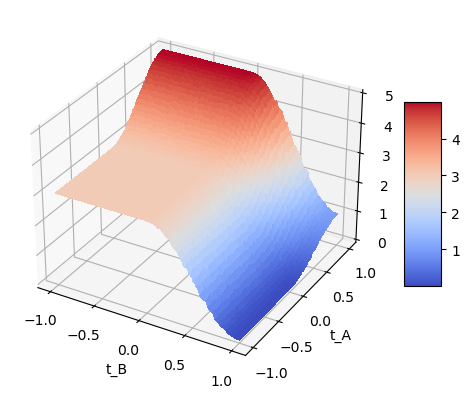

In [3]:
# No entanglement
plot_full_payoff_surface(payoff_matrix = "prisoners_dilemma", gamma = 0, player = 0)

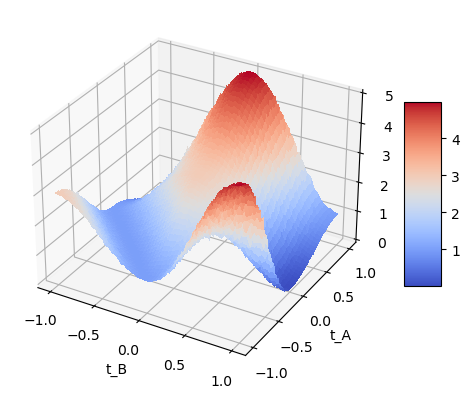

In [4]:
# Full entanglement
plot_full_payoff_surface(payoff_matrix = "prisoners_dilemma", gamma = np.pi / 2, player = 0)

## Simulate an Unfair Game

Player B is only allowed to play classical strategies.

In [9]:
def simulate_unfair_game(gamma = 0):
    tsB = np.linspace(0, 1, 50)

    payoffsC = []
    payoffsD = []
    payoffsM = []

    for tb in tsB:
        game = QuantumGame("prisoners_dilemma", gamma = gamma, thetaA = 0, phiA = 0, thetaB = tb * np.pi, phiB = 0)
        out = game.run()
        payoffsC.append(out[2])

        game = QuantumGame("prisoners_dilemma", gamma = gamma, thetaA = np.pi, phiA = 0, 
                           thetaB = tb * np.pi, phiB = 0)
        out = game.run()
        payoffsD.append(out[2])

        game = QuantumGame("prisoners_dilemma", gamma = gamma, thetaA = np.pi / 2, phiA = np.pi / 2, 
                           thetaB = tb * np.pi, phiB = 0)
        out = game.run()
        payoffsM.append(out[2])

    return payoffsC, payoffsD, payoffsM

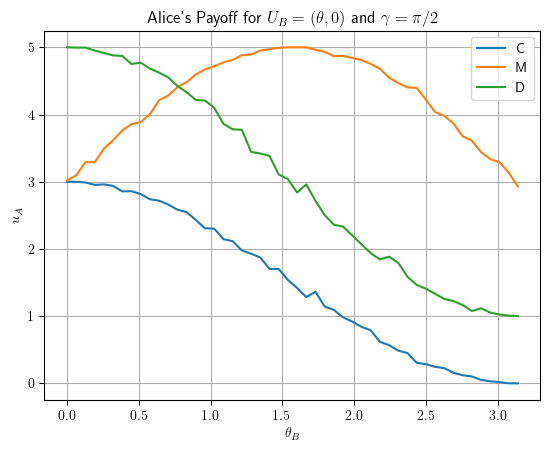

In [10]:
payoffsC, payoffsD, payoffsM = simulate_unfair_game(gamma = np.pi / 2)

plt.rcParams['text.usetex'] = True
plt.plot(np.linspace(0, 1, 50) * np.pi, payoffsC, label = r"C")
plt.plot(np.linspace(0, 1, 50) * np.pi, payoffsM, label = r"M")
plt.plot(np.linspace(0, 1, 50) * np.pi, payoffsD, label = r"D")
plt.xlabel(r"$\theta_B$")
plt.ylabel(r"$u_A$")
plt.title(r"Alice's Payoff for $U_B = (\theta, 0)$ and $\gamma = \pi/2$")
plt.legend()
plt.grid()